# Ejercicio de programación Regresión Polinomial

In [ ]:
# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

In [ ]:
# Cargar datos
#data = np.loadtxt(os.path.join('Datasets', 'capacidad_adquisitiva.csv'), delimiter=';')
#from numpy import genfromtxt
#data = genfromtxt(os.path.join('Datasets', 'capacidad_adquisitiva.csv'), delimiter=';')
data = np.loadtxt('salarios.txt', delimiter=";")
#print(data)
X = data[:, :1]
y = data[:, 1]
m = y.size
#print(X)
#print(y)
# imprimir algunos puntos de datos
#print('{:>8s}{:>10s}'.format(X, y))
#print('-'*26)
for i in range(len(data)):
    print('{:8.0f}{:10.0f}'.format(X[i, 0], y[i]))

      10       500
      15       700
      20      1000
      25      1200
      30      2000
      35      2500
      40      2600
      45      3200
      50      3400
      55      3600
      60      4000
      65      4200
      70      4500
      75      4000
      80      3500
      85      3000
      90      2700


In [ ]:
def plotData(x, y):
    #Grafica los puntos x e y en una figura nueva. 
    
    fig = pyplot.figure()  # abre una nueva figura
    
    pyplot.plot(x, y, 'ro', ms=10, mec='k')
    pyplot.ylabel('Edad personas')
    pyplot.xlabel('Capacidad adquisitiva 1,000s')


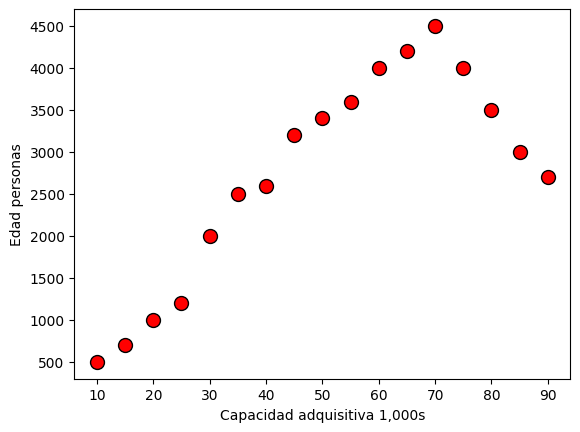

In [ ]:
plotData(X, y)

In [ ]:
X = np.concatenate([X, X * X], axis=1)

In [ ]:
print(X)

[[  10.  100.]
 [  15.  225.]
 [  20.  400.]
 [  25.  625.]
 [  30.  900.]
 [  35. 1225.]
 [  40. 1600.]
 [  45. 2025.]
 [  50. 2500.]
 [  55. 3025.]
 [  60. 3600.]
 [  65. 4225.]
 [  70. 4900.]
 [  75. 5625.]
 [  80. 6400.]
 [  85. 7225.]
 [  90. 8100.]]


In [ ]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma
    
    return X_norm, mu, sigma

In [ ]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

#print(X)
#print('Media calculada:', mu)
#print('Desviación estandar calculada:', sigma)
#print(X_norm)

Despues de `featureNormalize` la funcion es provada, se añade el temino de interseccion a `X_norm`:

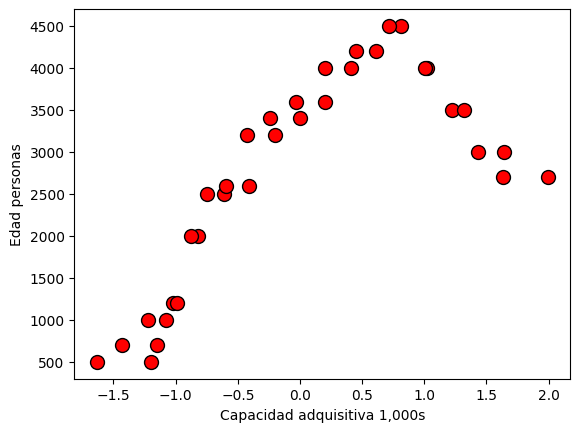

In [ ]:
plotData(X_norm, y)

In [ ]:
# Añade el termino de interseccion a X
# (Columna de unos para X0)
#X_norm = np.concatenate([X_norm, X_norm * X_norm], axis=1)
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [ ]:
print(X)

[[ 1.         -1.63299316 -1.19665405]
 [ 1.         -1.42886902 -1.14679346]
 [ 1.         -1.22474487 -1.07698864]
 [ 1.         -1.02062073 -0.98723959]
 [ 1.         -0.81649658 -0.8775463 ]
 [ 1.         -0.61237244 -0.74790878]
 [ 1.         -0.40824829 -0.59832702]
 [ 1.         -0.20412415 -0.42880103]
 [ 1.          0.         -0.23933081]
 [ 1.          0.20412415 -0.02991635]
 [ 1.          0.40824829  0.19944234]
 [ 1.          0.61237244  0.44874527]
 [ 1.          0.81649658  0.71799243]
 [ 1.          1.02062073  1.00718382]
 [ 1.          1.22474487  1.31631945]
 [ 1.          1.42886902  1.64539931]
 [ 1.          1.63299316  1.99442341]]


<a id="section5"></a>
### 2.2 Descenso por el gradiente

En el ejemplo anterior se implemento el descenso por el gradiente para un problema de regresion univariable. La unica diferencia es que ahora existe una caracteristica adicional en la matriz $X$. La función de hipótesis y la regla de actualización del descenso del gradiente por lotes permanecen sin cambios.

La implementacion de las funciones `computeCostMulti` y `gradientDescentMulti` son similares a la funcion de costo y función de descenso por el gradiente de la regresión lineal multiple es similar al de la regresion lineal multivariable. Es importante garantizar que el codigo soporte cualquier numero de caracteristicas y esten bien vectorizadas.

Se puede utilizar `shape`, propiedad de los arrays `numpy`, para identificar cuantas caracteristicas estan consideradas en el dataset.

<div class="alert alert-block alert-warning">
**Nota de implementación:** En el caso de multivariables, la función de costo puede se escrita considerando la forma vectorizada de la siguiente manera:

$$ J(\theta) = \frac{1}{2m}(X\theta - \vec{y})^T(X\theta - \vec{y}) $$

donde:

$$ X = \begin{pmatrix}
          - (x^{(1)})^T - \\
          - (x^{(2)})^T - \\
          \vdots \\
          - (x^{(m)})^T - \\ \\
        \end{pmatrix} \qquad \mathbf{y} = \begin{bmatrix} y^{(1)} \\ y^{(2)} \\ \vdots \\ y^{(m)} \\\end{bmatrix}$$

La version vectorizada es eficiente cuando se trabaja con herramientas de calculo numericos computacional como `numpy`. 
</div>

<a id="computeCostMulti"></a>

In [ ]:
def computeCostMulti(X, y, theta):
    # Inicializa algunos valores utiles
    m = y.shape[0] # numero de ejemplos de entrenamiento
    
    J = 0
    
    h = np.dot(X, theta)
    
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
    
    return J


In [ ]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    
    # Inicializa algunos valores 
    m = y.shape[0] # numero de ejemplos de entrenamiento
    
    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    
    J_history = []
    
    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCostMulti(X, y, theta))
    
    return theta, J_history

#### 3.2.1 Seleccionando coheficientes de aprendizaje


theta calculado por el descenso por el gradiente: [2741.05264248 1186.31530062 -285.76257817]
El sueldo para una persona de 33 (usando el descenso por el gradiente): $1929


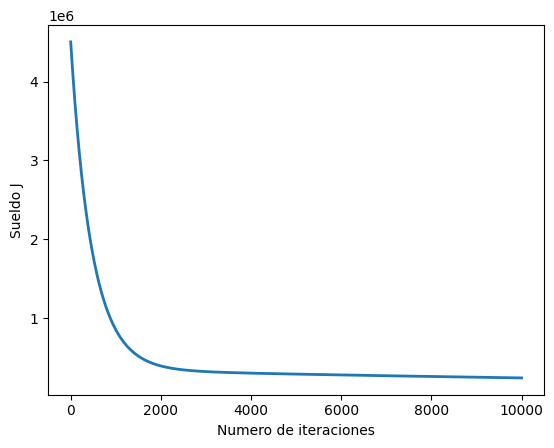

In [ ]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.001
num_iters = 10000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(3)
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

# Grafica la convergencia del sueldo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Sueldo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

# La capacidad adquisitiva de sueldo de una persona de 33 años
X_array = [1, 33, 3000]
X_array[1:3] = (X_array[1:3] - mu) / sigma
sueldo = np.dot(X_array, theta)   # Se debe cambiar esto

print('El sueldo para una persona de 33 (usando el descenso por el gradiente): ${:.0f}'.format(sueldo))

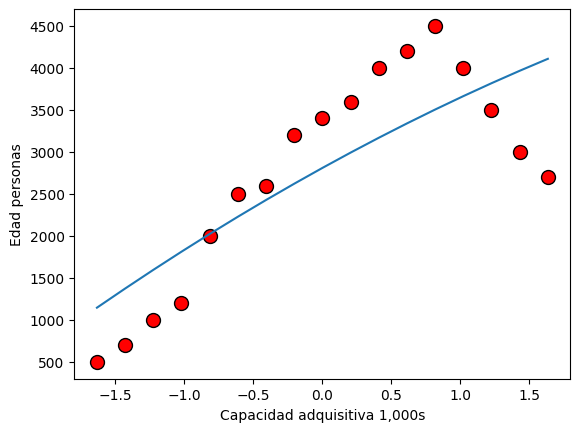

In [ ]:
plotData(X[:, 1], y)
pyplot.plot(X[:, 1], np.dot(X, theta), '-')

In [ ]:
X_array = [1, 23, 529]
X_array[1:3] = (X_array[1:3] - mu) / sigma

In [ ]:
X_array[1:3]
print(np.dot(X_array, theta))

1726.4712364992436


<a id="section7"></a>
### 2.3 Ecuacion de la Normal

Una manera de calcular rapidamente el modelo de una regresion lineal es:

$$ \theta = \left( X^T X\right)^{-1} X^T\vec{y}$$

Utilizando esta formula no requiere que se escale ninguna caracteristica, y se obtendra una solucion exacta con un solo calculo: no hay “bucles de convergencia” como en el descenso por el gradiente. 

Primero se recargan los datos para garantizar que las variables no esten modificadas. Recordar que no es necesario escalar las caracteristicas, se debe agregar la columna de unos a la matriz $X$ para tener el termino de intersección($\theta_0$). 

In [ ]:
# Cargar datos
data = np.loadtxt('salarios.txt', delimiter=";")
X = data[:, :1]
y = data[:, 1]
m = y.size
X_original = X.copy()
X = np.concatenate([X, X * X], axis=1)
X = np.concatenate([np.ones((m, 1)), X], axis=1)

In [ ]:
def normalEqn(X, y):
  
    theta = np.zeros(X.shape[1])
    
    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)
    
    return theta

In [ ]:
# Calcula los parametros con la ecuación de la normal
theta = normalEqn(X, y);

# Muestra los resultados optenidos a partir de la aplicación de la ecuación de la normal
print('Theta calculado a partir de la ecuación de la normal: {:s}'.format(str(theta)));

# Estimar el precio para una casa de superficie de 1650 sq-ft y tres dormitorios

X_array = [1, 20, 400]
price = np.dot(X_array, theta) 

print('Precio predecido para una cada de superficie de 1650 sq-ft y 3 dormitorios (usando la ecuación de la normal): ${:.0f}'.format(price))

Theta calculado a partir de la ecuación de la normal: [-1.62450980e+03  1.64989680e+02 -1.25283798e+00]
Precio predecido para una cada de superficie de 1650 sq-ft y 3 dormitorios (usando la ecuación de la normal): $1174


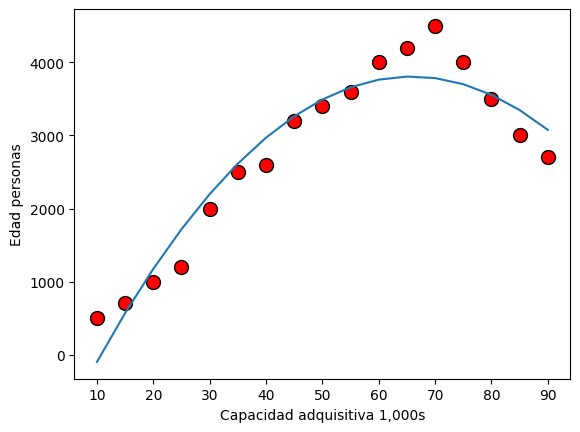

In [ ]:
plotData(X[:, 1], y)
#X = np.concatenate([np.ones((m, 1)), X], axis=1)
#X = np.concatenate([X, X * X], axis=1)

pyplot.plot(X[:, 1], np.dot(X, theta), '-')